In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
cust_seg = pd.read_csv("cust_seg.csv")

/tmp/ipykernel_12075/325118354.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  cust_seg = pd.read_csv("cust_seg.csv")


In [3]:
cust_seg.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [5]:
#let's drop the unnamed column
cust_seg.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
#let's drop the cod_prov column
cust_seg.drop(["cod_prov"],axis=1, inplace=True)

In [7]:
#let's drop the ncodpers column
cust_seg.drop(["ncodpers"],axis=1,inplace=True)

In [8]:
cust_seg['ind_nuevo'].mode()[0]

0.0

In [9]:
cust_seg['age'].unique() #taxes

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113'], dtype=object)

In [10]:
cust_seg['tipodom'].unique() #taxes

array([ 1., nan])

In [11]:
#drop tipodom column because it has only value 1 
cust_seg.drop(['tipodom'],axis=1,inplace=True)

In [12]:
cust_seg['ind_reca_fin_ult1'].unique() #taxes

array([0, 1])

In [13]:
cust_seg['indrel'].mode()[0] #taxes

1.0

In [14]:
cust_seg['indrel_1mes'].mode()[0] #taxes

1.0

In [15]:
cust_seg['ind_nomina_ult1'].unique() 
cust_seg['ind_nomina_ult1'].mode()[0] 


0.0

In [16]:
cust_seg['ind_nom_pens_ult1'].mode()[0]


0.0

### Missing Values

<AxesSubplot:>

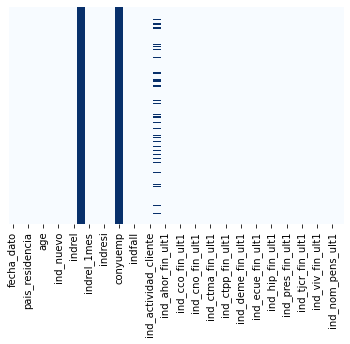

In [17]:
sns.heatmap(cust_seg.isnull(),yticklabels=False, cbar=False, cmap="Blues")

In [18]:
cust_seg.isnull().sum()

fecha_dato                    0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco_fin_ult1             0
ind_deme_fin_ult1             0
ind_dela

In [19]:
#drop all variables that have more than 80% of the data missing (conyuemp,ult_fec_cli_1t)

#let's drop the column ult_fec_cli_1t with 998899 missing values 
cust_seg.drop(['ult_fec_cli_1t'],axis=1,inplace=True)
#let's drop the column conyuemp  wtih 999822 missing values 
cust_seg.drop(['conyuemp'],axis=1,inplace=True)
#let's drop the column of fecha_dato
cust_seg.drop(['fecha_dato'], axis=1, inplace=True)

In [20]:
#let's see if there is any duplicated row
cust_seg.duplicated().sum()

357802

In [21]:
#let's remove the duplicated rows
cust_seg.drop_duplicates(inplace=True)

In [22]:
cust_seg.duplicated().sum()

0

In [24]:
#let's replace the missing values in the categrocial colums except the date #'age(int)'#'antiguedad'(int/float)
categrocial_list=['indresi','pais_residencia','nomprov', 'tiprel_1mes', 'indext', 'sexo','ind_empleado',
                  'canal_entrada','indfall']
for i in categrocial_list:
    cust_seg.loc[(cust_seg[i].isnull()==True),i]= cust_seg[i].mode()[0]

In [25]:
#replace the missing vlues in "renta" column with mean()
cust_seg["renta"] = cust_seg["renta"].fillna(cust_seg["renta"].mean())



In [26]:
cust_seg['ind_nomina_ult1'] = cust_seg['ind_nomina_ult1'].fillna(cust_seg['ind_nomina_ult1'].mode()[0])
cust_seg['ind_nom_pens_ult1'] = cust_seg['ind_nom_pens_ult1'].fillna(cust_seg['ind_nom_pens_ult1'].mode()[0])
cust_seg['ind_nuevo'] = cust_seg['ind_nuevo'].fillna(cust_seg['ind_nuevo'].mode()[0])
cust_seg['ind_actividad_cliente'] = cust_seg['ind_actividad_cliente'].fillna(cust_seg['ind_actividad_cliente'].mode()[0])




In [27]:
cust_seg.loc[(cust_seg["indrel"].isnull()==True),"indrel"]= cust_seg["indrel"].mode()[0]
cust_seg.loc[(cust_seg["indrel_1mes"].isnull()==True),"indrel_1mes"]= cust_seg["indrel_1mes"].mode()[0]



In [28]:
cust_seg.isnull().sum()

ind_empleado               0
pais_residencia            0
sexo                       0
age                        0
fecha_alta               206
ind_nuevo                  0
antiguedad                 0
indrel                     0
indrel_1mes                0
tiprel_1mes                0
indresi                    0
indext                     0
canal_entrada              0
indfall                    0
nomprov                    0
ind_actividad_cliente      0
renta                      0
ind_ahor_fin_ult1          0
ind_aval_fin_ult1          0
ind_cco_fin_ult1           0
ind_cder_fin_ult1          0
ind_cno_fin_ult1           0
ind_ctju_fin_ult1          0
ind_ctma_fin_ult1          0
ind_ctop_fin_ult1          0
ind_ctpp_fin_ult1          0
ind_deco_fin_ult1          0
ind_deme_fin_ult1          0
ind_dela_fin_ult1          0
ind_ecue_fin_ult1          0
ind_fond_fin_ult1          0
ind_hip_fin_ult1           0
ind_plan_fin_ult1          0
ind_pres_fin_ult1          0
ind_reca_fin_u

In [29]:
#finally we can drop the 338 rows with missing dates fecha_alta
cust_seg=cust_seg.dropna()

In [30]:
cust_seg.isnull().sum()

ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
i

In [31]:
cust_seg.to_csv("cust_cleaned.csv",index=False)

In [32]:
cust_cleaned = pd.read_csv("cust_cleaned.csv")

## Finishing Handeling missing values

### features grouping numeric , date, categorical

In [33]:
date_feat=['fecha_alta']
numeric_feat=['age','renta','antiguedad']
bioniomial_feat =['sexo','ind_nuevo','indrel','indresi', 'indext','indfall','ind_actividad_cliente']
multicategorical_feat = ['ind_empleado','pais_residencia', 'nomprov','canal_entrada', 'indrel_1mes','tiprel_1mes']
intcategorical_vars = ['ind_ahor_fin_ult1','ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1','ind_cno_fin_ult1',
                       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1','ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1', 
                       'ind_plan_fin_ult1','ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1','ind_valo_fin_ult1',
                       'ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1', 'ind_recibo_ult1']

In [34]:
#transofrming the categorical data type into category
cust_cleaned[multicategorical_feat]=cust_cleaned[multicategorical_feat].astype('category')
cust_cleaned[bioniomial_feat]=cust_cleaned[bioniomial_feat].astype('category')
cust_cleaned[intcategorical_vars]=cust_cleaned[intcategorical_vars].astype('category')


In [35]:
#transforming numeric features into int type
cust_cleaned[numeric_feat]=cust_cleaned[numeric_feat].round(0).astype('int')

In [36]:
cust_cleaned['fecha_alta']=cust_cleaned['fecha_alta'].apply(lambda _:datetime.datetime.strptime(_,'%Y-%m-%d'))



In [37]:
cust_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641992 entries, 0 to 641991
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ind_empleado           641992 non-null  category      
 1   pais_residencia        641992 non-null  category      
 2   sexo                   641992 non-null  category      
 3   age                    641992 non-null  int64         
 4   fecha_alta             641992 non-null  datetime64[ns]
 5   ind_nuevo              641992 non-null  category      
 6   antiguedad             641992 non-null  int64         
 7   indrel                 641992 non-null  category      
 8   indrel_1mes            641992 non-null  category      
 9   tiprel_1mes            641992 non-null  category      
 10  indresi                641992 non-null  category      
 11  indext                 641992 non-null  category      
 12  canal_entrada          641992 non-null  cate

###  outliers Detection and removing

In [38]:
def outlier(f):
    q1 = cust_cleaned[f].quantile(0.25)
    q3 = cust_cleaned[f].quantile(0.75)
    qrt = q3-q1
    lower_bound = q1-1.5*qrt
    upper_bound = q3+1.5*qrt
    upper = np.where(cust_cleaned[f] >= upper_bound)
    lower = np.where(cust_cleaned[f] <= lower_bound)
    cust_cleaned.drop(upper[0], inplace = True)
    cust_cleaned.drop(lower[0], inplace = True)
    

In [40]:
outlier('age')
outlier('antiguedad')

In [42]:
cust_cleaned.to_csv('cust_seg_cleaned.csv')